In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import exp, factorial

import warnings
warnings.filterwarnings('ignore')

# Regressão para Dados de Contagem
## Distribuição de Poisson e Binomial Negativa

Exmplo da aula do MBA DSA USP/ESALQ com Prof. Luiz Fávero


### Objetivo

Analisar o comportamento de uma variável depedente em função de variáveis preditoras.<br>

Características da variável Dependente:

- **Quantitiva**
- **Valores discretos**
- **Não negativos**
- **Exposição** <br>(ex.: taxa de chegada de clientes por hora / qtd de filhos por casal / qtd de apartamentos à venda por m2)
    - A exposição dá a forma funcional da função densidade de probabilidade.
    - Fazer estudo sobre a existência de superdispersão para optar entre a Distribuição de Poisson ou Binomial Negativa

### Contexto

Fisman, R.; Miguel, E. Corruption, Norms, and Legal Enforcement:<br>
Evidence from Diplomatic Parking Tickets.<br>
Journal of Political Economy, v. 15, n. 6, p. 1020-1048, 2007.<br>
https://www.journals.uchicago.edu/doi/abs/10.1086/527495

Base contendo evidências de corrupção em multas de estacionamento.

Os membros de corpo diplomático não precisam pagar multa caso estacionem em lugar proibido.<br>


- country
- violations: qtde de violações de trânsito por mês
- staff: qtde de membros do corpo diplomático
- post: antes ou depois da obrigatotriedade de multa instituído pelo prefeitura de NY
- corruption: indicador de corrupção do pais. Maior pior.

**Constructor**

violations/month ~ staff + post + corruption

ln(violations) = alpha + B1staff + B2post + B3corruption

In [6]:
#Estabelecendo uma função da distribuição Poisson para determinados valores
#de lambda
def poisson_lambda(lmbda,m):
    return (exp(-lmbda) * lmbda ** m) / factorial(m)


# In[ ]: Plotagem das funções estabelecidas para diferentes valores de lambda

m = np.arange(0,21)

lmbda_1 = []
lmbda_2 = []
lmbda_4 = []

for item in m:
    # Estabelecendo a distribuição com lambda = 1
    lmbda_1.append(poisson_lambda(1,item))
    # Estabelecendo a distribuição com lambda = 2
    lmbda_2.append(poisson_lambda(2,item))
    # Estabelecendo a distribuição com lambda = 4
    lmbda_4.append(poisson_lambda(4,item))

#Criando um dataframe com m variando de 0 a 20 e diferentes valores de lambda
df_lambda = pd.DataFrame({'m':m,
                          'lambda_1':lmbda_1,
                          'lambda_2':lmbda_2,
                          'lambda_4':lmbda_4})

Encontrar os parâmetros das funções que melhor encaixa na distribuição da variável dependente

<function matplotlib.pyplot.show(close=None, block=None)>

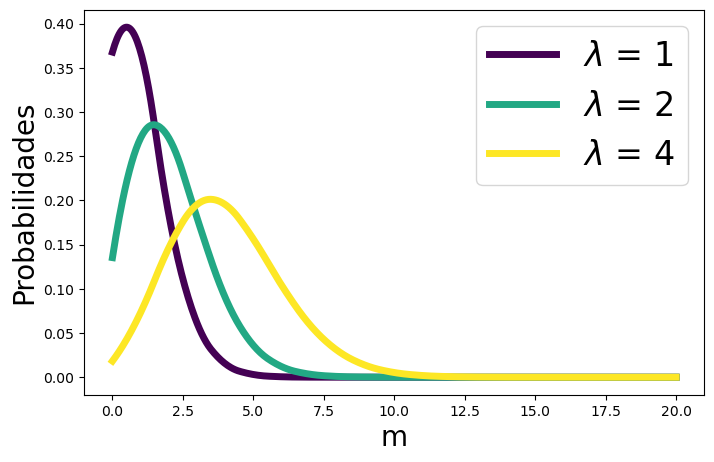

In [10]:
# Plotagem propriamente dita

from scipy.interpolate import interp1d

def smooth_line_plot(x,y):
    x_new = np.linspace(x.min(), x.max(),500)
    f = interp1d(x, y, kind='quadratic')
    y_smooth=f(x_new)
    return x_new, y_smooth

x_new, lambda_1 = smooth_line_plot(df_lambda.m, df_lambda.lambda_1)
x_new, lambda_2 = smooth_line_plot(df_lambda.m, df_lambda.lambda_2)
x_new, lambda_4 = smooth_line_plot(df_lambda.m, df_lambda.lambda_4)

plt.figure(figsize=(8,5))
plt.plot(x_new,lambda_1, linewidth=5, color='#440154FF')
plt.plot(x_new,lambda_2, linewidth=5, color='#22A884FF')
plt.plot(x_new,lambda_4, linewidth=5, color='#FDE725FF')
plt.xlabel('m', fontsize=20)
plt.ylabel('Probabilidades', fontsize=20)
plt.legend([r'$\lambda$ = 1',r'$\lambda$ = 2',r'$\lambda$ = 4'], fontsize=24)
plt.show

In [11]:
#Importando a base
df_corrupcao = pd.read_csv(r'bases\corruption.csv')
df_corrupcao

,country,code,violations,staff,post,corruption
0,Angola,AGO,50,9,no,1.047506
1,Angola,AGO,1,9,yes,1.047506
2,Albania,ALB,17,3,no,0.921079
3,Albania,ALB,0,3,yes,0.921079
4,United Arab Emirates,ARE,0,3,no,-0.779468
...,...,...,...,...,...,...
293,Zaire,ZAR,0,6,yes,1.582807
294,Zambia,ZMB,37,9,no,0.562193
295,Zambia,ZMB,0,9,yes,0.562193
296,Zimbabwe,ZWE,43,14,no,0.133379


In [12]:
df_corrupcao.country.value_counts()

Angola       2
Mauritius    2
Malaysia     2
Namibia      2
Niger        2
            ..
Georgia      2
Ghana        2
Guinea       2
Gambia       2
Zimbabwe     2
Name: country, Length: 149, dtype: int64

In [13]:
df_corrupcao.describe()

,violations,staff,corruption
count,298.000000,298.000000,298.000000
mean,6.496644,11.805369,0.013641
std,18.210377,11.079558,1.012474
min,0.000000,2.000000,-2.582988
25%,0.000000,6.000000,-0.415147
50%,0.000000,9.000000,0.326959
75%,3.000000,14.000000,0.720250
max,167.000000,86.000000,1.582807


In [14]:
df_corrupcao.post.value_counts()

no     149
yes    149
Name: post, dtype: int64

In [15]:
df_corrupcao.groupby('violations').count()

,country,code,staff,post,corruption
violations,,,,,
0,156,156,156,156,156
1,35,35,35,35,35
2,16,16,16,16,16
3,17,17,17,17,17
4,5,5,5,5,5
5,10,10,10,10,10
6,3,3,3,3,3
7,4,4,4,4,4
8,3,3,3,3,3


### Qual distribuição se associa ao comportamento de Y no histograma abaixo?

Sempre fazer o diagnóstico sobre o comportamento da variável estudada Y para maximizar o acerto entre os valores reais e os previstos. Os parâmetros que serão estimados  vão levar em consideração um logarítmo de uma função de verossimilhança que seja oriunda daquela função densidade de probabilidade.

Nenhuma distribuição da vida real será idêntica a uma distribuição teórica, temos que fazer ajustes para sobrepor e minimizar as diferenças.

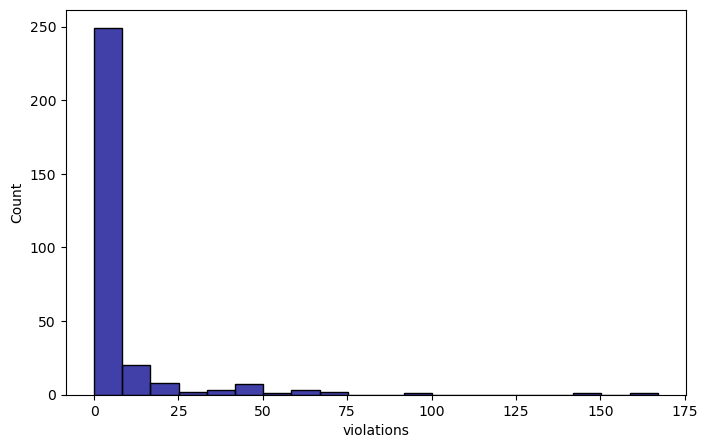

In [21]:
#Histograma da variável dependente 'violations'

plt.figure(figsize=(8,5))
sns.histplot(data=df_corrupcao, x="violations", bins=20, color='darkblue')
plt.show()

## Diagnóstico Preliminar para Avaliar se a Média da Y é igual a Variância

Média = Variância - Indicativo de que a Y segue uma distribuição de Poisson

Variância bem maior que a média é indicativo de **superdispersão (overdispersion)**<br>
Nesse caso a Média é muito diferente da Variância, poderíamos partir para a Binomial Negativa.

In [8]:
print(f'Média: {df_corrupcao.violations.mean():.3f}')
print(f'Variância: {df_corrupcao.violations.var():.3f}')

Média: 6.497
Variância: 331.618


In [9]:
#Média de staffs antes e depois da cobrança de multa
df_corrupcao.groupby('post')['staff'].mean()

post
no     11.805369
yes    11.805369
Name: staff, dtype: float64

In [10]:
#Média de violações antes e depois da cobrança de multa
df_corrupcao.groupby('post')['violations'].mean()

post
no     12.818792
yes     0.174497
Name: violations, dtype: float64

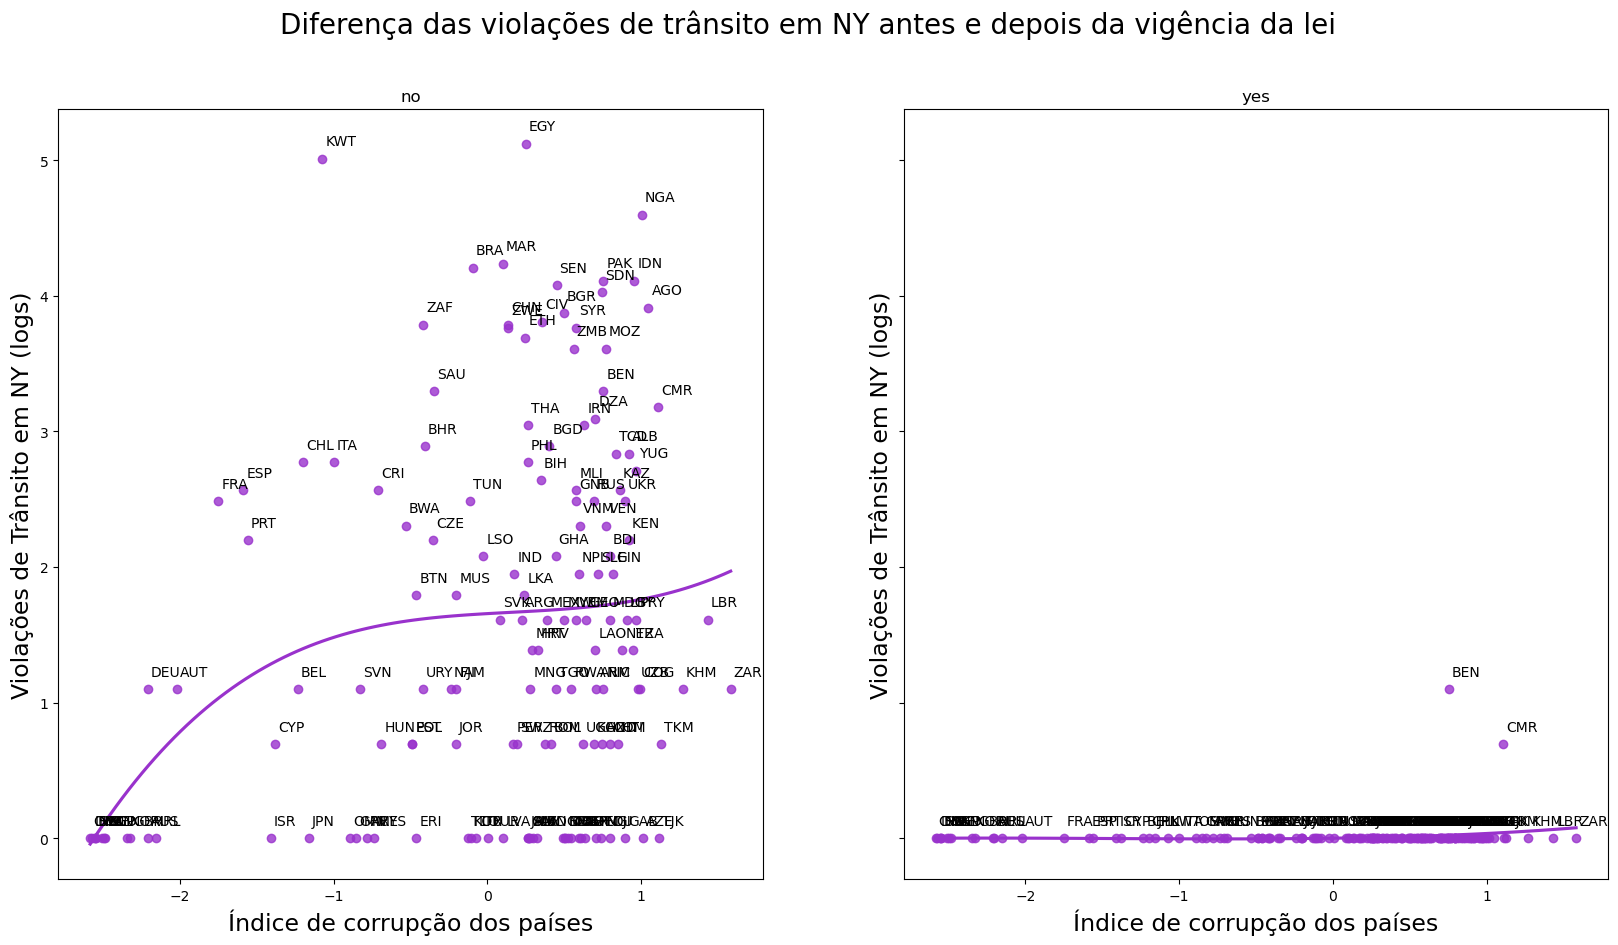

In [55]:
#Comportamento das variáveis 'corruption' e 'violations' antes e
#depois do início da vigência da lei

fig, axs = plt.subplots(ncols=2, figsize=(20,10), sharey=True)

fig.suptitle('Diferença das violações de trânsito em NY antes e depois da vigência da lei',
             fontsize = 20)

post = ['no','yes']

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y']+.1, str(point['val']))

for i, v in enumerate(post):
    df = df_corrupcao[df_corrupcao.post==v]
    df['violations'] = np.log(df.violations)
    df.loc[df['violations']==np.inf, 'violations'] = 0
    df.loc[df['violations']==-np.inf, 'violations'] = 0
    sns.regplot(data=df, x='corruption', y='violations',order=3, ax=axs[i],
                ci=False, color='darkorchid')
    axs[i].set_title(v)
    axs[i].set_ylabel("Violações de Trânsito em NY (logs)", fontsize = 17)
    axs[i].set_xlabel("Índice de corrupção dos países", fontsize = 17)
    label_point(df.corruption, df.violations, df.code, axs[i])  

plt.show()

## Estimando modelo Poisson

Log-Likelihood > melhor<br>
Objetivo de Maximizar o LogLike

Aplicar Stepwise caso o beta não seja estatisticamente significativo diferente de zero 

In [26]:
#https://www.statsmodels.org/stable/glm.html#links
import statsmodels.api as sm

modelo_poisson = sm.GLM.from_formula(formula='violations ~ staff + post + corruption', 
                                     family=sm.families.Poisson(), data= df_corrupcao).fit()

In [27]:
modelo_poisson.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             violations   No. Observations:                  298
Model:                            GLM   Df Residuals:                      294
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2071.8
Date:                Thu, 30 Mar 2023   Deviance:                       3644.0
Time:                        18:37:55   Pearson chi2:                 6.77e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.9999
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.2127      0.031     71.134      0.000       2.152       2.274
post[T.yes]    -4.2968      0.197    -21.762      0.000      -4.684      -3.910
staff           0.0219      0.001     17.807      0.000       0.019       0.024
corruption      0.3418      0.027     12.430      0.000       0.288       0.396
===============================================================================
"""

### Comparando LogLike do Modelo contra o Modelo Nulo

#### LRTest - Likelihood Ratio Test

Verificar se o ganho de LogLike do modelo é estatisticamente significativo contra o modelo Nulo com a inclusão de variáveis preditoras X.

Teste Qui-quadrado onde p-valor < 0,05 rejeita H0. Pelo menos 1 beta é estatisticamente diferente de zero.

In [48]:
from llr_test import llr_test

llr_test(modelo_poisson, modelo_poisson)

LogLike Modelo Nulo: -3448.65
LogLike Modelo: -2071.79
Estatistica Chi2: 2753.71
P-value Chi2: 0.0


In [14]:
#Média de contribuição por linha do LogLike
#Melhores valores mais próximos de zero (menos erros de verossimilhança)

modelo_poisson.llf / 298 # <- qtde de observações

-6.952328029412261

## Teste de Superdispersão Cameron e Trivedi

Podemos afirmar que a Distribuição Poisson é o melhor modelo?

Se houver Superdispersão o melhor modelo é o Binomial Negativo para dados de contagem com distribuição com cauda Longa.

CAMERON, A. C.; TRIVEDI, P. K. Regression-based tests for overdispersion in
the Poisson model. Journal of Econometrics, v. 46, n. 3, p. 347-364, 1990.


<center><img src='img\cameron_trivedi.jpg'></center>



- 1º Passo: estimar um modelo Poisson;

- 2º Passo: criar uma nova variável (Y*) utilizando os fitted values do modelo Poisson estimado anteriormente;

- 3º Passo: estimar um modelo auxiliar OLS, com a variável Y* como variável dependente, os fitted values do modelo Poisson como única variável preditora e  sem o intercepto;

- 4º Passo: Observar a significância do parâmetro beta.

> H0: Y segue uma distribuição de Poisson; <br>
> H1: Y apresenta superdispersão em relação à distribuição de Poisson

p-value < 0,05 rejeita H0


In [19]:
# Função Teste_Cameron_Trivedi para Superdispersão
def c_trivedi (var_y, fitted_values):
    
    from scipy.stats import chi2
    
    y_star = ((var_y - fitted_values)**2 - var_y) / fitted_values
    df = pd.DataFrame([y_star, var_y, fitted_values]).T
    
    modelo_aux = sm.OLS.from_formula(formula='y_star ~ 0 + fitted_values', data=df).fit()
    
    return print(f""" Teste de Superdispersão - Cameron e Trivedi 1990
    
    t-test score: {round(modelo_aux.tvalues.item(),4)}, p-value = {modelo_aux.f_pvalue.round(4)}
    **Se p-value < 0.05, existe superdispersão**""")

In [20]:
#from c_trivedi import c_trivedi
c_trivedi(df_corrupcao.violations, modelo_poisson.fittedvalues)

 Teste de Superdispersão - Cameron e Trivedi 1990
    
    t-test score: 2.7538, p-value = 0.0063
    **Se p-value < 0.05, existe superdispersão**


In [28]:
from statstests.tests import overdisp

#Elaboração direta do teste de superdispersão
overdisp(modelo_poisson, df_corrupcao)

Estimating model...: 
 GLM
                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.022    
Dependent Variable:     ystar            AIC:                         3907.7809
Date:                   2023-03-30 18:37 BIC:                         3911.4780
No. Observations:       298              Log-Likelihood:              -1952.9  
Df Model:               1                F-statistic:                 7.584    
Df Residuals:           297              Prob (F-statistic):          0.00625  
R-squared (uncentered): 0.025            Scale:                       28915.   
-------------------------------------------------------------------------------------
            Coef.        Std.Err.         t          P>|t|        [0.025       0.975]
-------------------------------------------------------------------------------------
lmbda       2.6525         0.9632       2.7538       0.0063       0.7569       4.5480
-------------

**P-value do beta = 0,006, ou seja, < 0,05 tem superdispersão. Necessário Rodar o modelo Binomial Negativo.**

## Usando Modelo statsmodel.api.Poisson

In [29]:
#Definindo variáveis
X = sm.add_constant(df_corrupcao.iloc[:,3:6])
y = df_corrupcao.violations

#Para esse modelo é necessário transformar a variável qualitativa em Dummie
X_dum = pd.get_dummies(X, 'post', drop_first=True)

#Gera o modelo
sm_poisson = sm.Poisson(y, X_dum).fit()

Optimization terminated successfully.
         Current function value: 6.952328
         Iterations 9


In [30]:
sm_poisson.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:             violations   No. Observations:                  298
Model:                        Poisson   Df Residuals:                      294
Method:                           MLE   Df Model:                            3
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.3992
Time:                        18:39:56   Log-Likelihood:                -2071.8
converged:                       True   LL-Null:                       -3448.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2127      0.031     71.134      0.000       2.152       2.274
staff          0.0219      0.001     17.807      0.000       0.019       0.024
corruption     0.3418      0.027     12.430      0.000       0.288       0.396
post_yes      -4.2968      0.197    -21.762      0.000      -4.684      -3.910
==============================================================================
"""

In [31]:
#0 - const
#1 - staff
#2 - corruption
#3 - post (yes:1, no:0)

sm_poisson.predict([1, 23, 0.5, 0])

array([17.93283965])

# Distribuição Binomial Negativa ou Poisson-Gama

Avaliar a quantidade de observações para X ocorrências. (o oposto da distribuição Binomial - Bernoulli em que avalia a quantidade de ocorrências/sucessos para as n observações)

**Como o teste de Dispersão de Cameron e Trivedi constatou que a distribuição possui superdispersão, será necessário aplicar o modelo Binomial Negativo**

In [32]:
def bneg(theta, delta, m):
    return ((delta ** theta) * (m ** (theta - 1)) * (exp(-m * delta))) / factorial(theta - 1)


# In[ ]: Plotagem das funções estabelecidas para diferentes valores de
#theta e delta

m = np.arange(1,21)

bneg_theta2_delta2 = []
bneg_theta3_delta1 = []
bneg_theta3_delta05 = []

for item in m:
    # Estabelecendo a distribuição binomial negativa com theta=2 e delta=2
    bneg_theta2_delta2.append(bneg(2,2,item))
    # Estabelecendo a distribuição binomial negativa com theta=3 e delta=1
    bneg_theta3_delta1.append(bneg(3,1,item))
    # Estabelecendo a distribuição binomial negativa com theta=3 e delta=0.5
    bneg_theta3_delta05.append(bneg(3,0.5,item))
   
#Criando um dataframe com m variando de 1 a 20 e diferentes valores de theta e delta
df_bneg = pd.DataFrame({'m':m,
                        'bneg_theta2_delta2':bneg_theta2_delta2,
                        'bneg_theta3_delta1':bneg_theta3_delta1,
                        'bneg_theta3_delta05':bneg_theta3_delta05})

<function matplotlib.pyplot.show(close=None, block=None)>

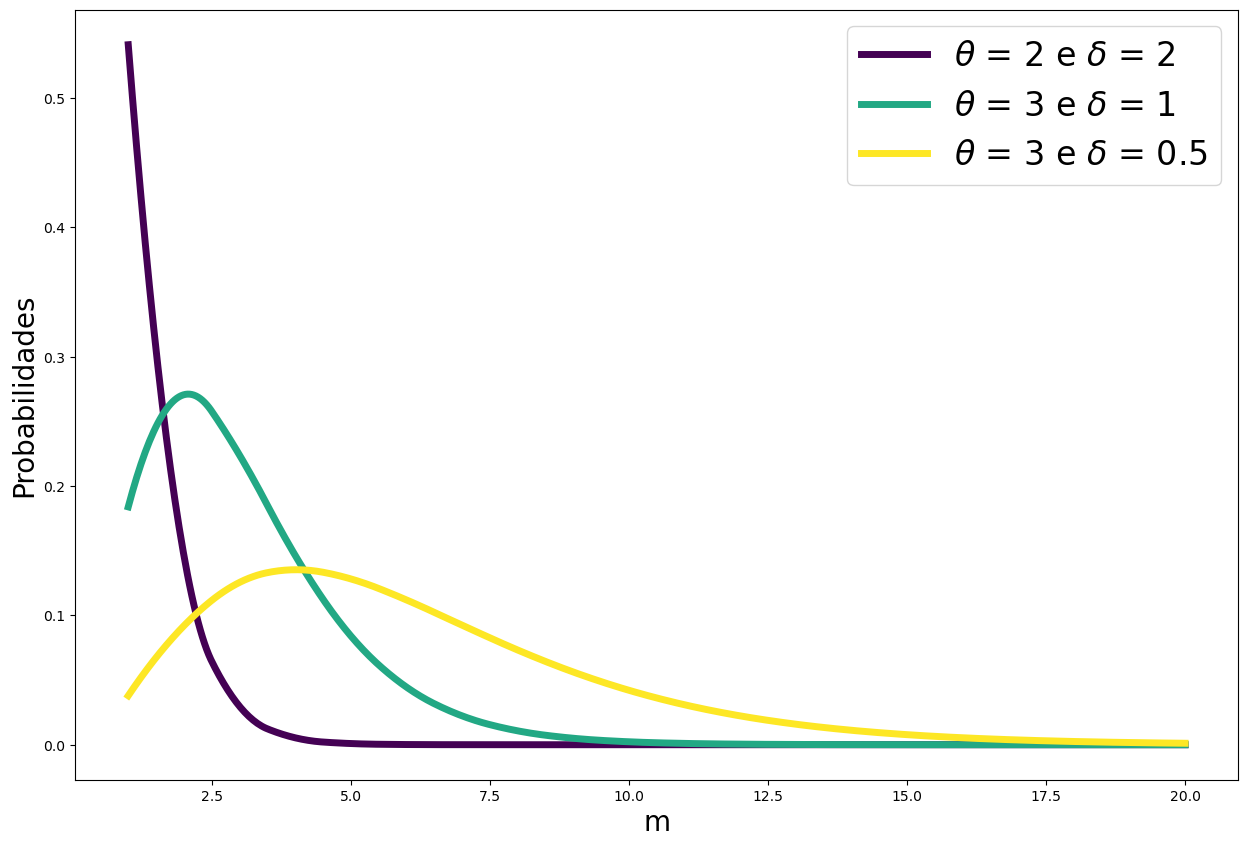

In [33]:
# In[ ]: Plotagem propriamente dita

def smooth_line_plot(x,y):
    x_new = np.linspace(x.min(), x.max(),500)
    f = interp1d(x, y, kind='quadratic')
    y_smooth=f(x_new)
    return x_new, y_smooth

x_new, bneg_theta2_delta2 = smooth_line_plot(df_bneg.m,
                                             df_bneg.bneg_theta2_delta2)
x_new, bneg_theta3_delta1 = smooth_line_plot(df_bneg.m,
                                             df_bneg.bneg_theta3_delta1)
x_new, bneg_theta3_delta05 = smooth_line_plot(df_bneg.m,
                                              df_bneg.bneg_theta3_delta05)

plt.figure(figsize=(15,10))
plt.plot(x_new,bneg_theta2_delta2, linewidth=5, color='#440154FF')
plt.plot(x_new,bneg_theta3_delta1, linewidth=5, color='#22A884FF')
plt.plot(x_new,bneg_theta3_delta05, linewidth=5, color='#FDE725FF')
plt.xlabel('m', fontsize=20)
plt.ylabel('Probabilidades', fontsize=20)
plt.legend([r'$\theta$ = 2 e $\delta$ = 2',
            r'$\theta$ = 3 e $\delta$ = 1',
            r'$\theta$ = 3 e $\delta$ = 0.5'],
           fontsize=24)
plt.show

## Estimando Modelo Binomial Negativo

In [34]:
modelo_bneg = sm.NegativeBinomial(y, X_dum).fit()

Optimization terminated successfully.
         Current function value: 1.904031
         Iterations: 19
         Function evaluations: 23
         Gradient evaluations: 23


In [35]:
modelo_bneg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     NegativeBinomial Regression Results                      
==============================================================================
Dep. Variable:             violations   No. Observations:                  298
Model:               NegativeBinomial   Df Residuals:                      294
Method:                           MLE   Df Model:                            3
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.1549
Time:                        18:41:09   Log-Likelihood:                -567.40
converged:                       True   LL-Null:                       -671.37
Covariance Type:            nonrobust   LLR p-value:                 8.088e-45
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9469      0.205      9.477      0.000       1.544       2.350
staff          0.0400      0.014      2.945      0.003       0.013       0.067
corruption     0.4527      0.133      3.396      0.001       0.191       0.714
post_yes      -4.2746      0.266    -16.065      0.000      -4.796      -3.753
alpha          2.0963      0.243      8.614      0.000       1.619       2.573
==============================================================================
"""

### Verificação da significância estatística do parâmetro de forma (theta) da distribuição negativa

se theta / erro_padrão_theta > 1,96 a 95% de nível de confiança, verifica-se a significância estatística, ou seja, o componente de superdispersão (1/phi) é estatisticamente diferente de zero.

**Ficamos com o modelo Binomial Negativo**

No python temos a estatística de alpha onde z = theta / erro_padrão_theta = 8.614 com p-value < 0,05

In [36]:
#Componente de Superdispersão
theta = 1/ modelo_bneg.params['alpha']
theta

0.4770223896142164

Equação = ln(lambBneg) = 1,9469 + 0,04staf - 4,2746 post_yes + 0,4527corruption

## Comparando os Dois Modelos: Poisson e Bneg

COMPARAÇÕES ENTRE AS PREVISÕES:<br>

Qual seria a quantidade média esperada de violações de trânsito para um país
cujo corpo diplomático seja composto por 23 membros, considerando o período
anterior à vigência da lei e cujo índice de corrupção seja igual 0.5?

O modelo Binomial Negativo consegue capturar melhor os valores dentro da cauda da distribuição do histograma

In [38]:
print(f'modelo poisson: {sm_poisson.predict([1, 23, 0.5, 0])}')
print(f'modelo BNeg: {modelo_bneg.predict([1, 23, 0.5, 0])}')

modelo poisson: [17.93283965]
modelo BNeg: [22.05713121]


In [5]:
# Cálculo Manual modelo BNEG

np.exp(1.9469 + 0.040018*23 - 4.2746*0 + 0.4527*0.5)

22.057749689795966

Qual seria a quantidade média esperada de violações de trânsito para o mesmo
país, porém agora considerando a vigência da lei?

Valores próximos de zero (iniciais) tem pouco impacto entre os dois modelos.

In [40]:
print(f'modelo poisson: {sm_poisson.predict([1, 23, 0.5, 1])}')
print(f'modelo BNeg: {modelo_bneg.predict([1, 23, 0.5, 1])}')

modelo poisson: [0.24411195]
modelo BNeg: [0.30697713]


### Incluindo os valores preditos

In [41]:
#Incluindo os valores preditos

df_corrupcao['fitted_poisson'] = modelo_poisson.fittedvalues
df_corrupcao['fitted_bneg'] = modelo_bneg.predict(X_dum)

In [42]:
df_corrupcao

,country,code,violations,staff,post,corruption,fitted_poisson,fitted_bneg
0,Angola,AGO,50,9,no,1.047506,15.919915,16.138708
1,Angola,AGO,1,9,yes,1.047506,0.216711,0.224608
2,Albania,ALB,17,3,no,0.921079,13.371720,11.987745
3,Albania,ALB,0,3,yes,0.921079,0.182023,0.166838
4,United Arab Emirates,ARE,0,3,no,-0.779468,7.477915,5.551744
...,...,...,...,...,...,...,...,...
293,Zaire,ZAR,0,6,yes,1.582807,0.243691,0.253817
294,Zambia,ZMB,37,9,no,0.562193,13.486751,12.955729
295,Zambia,ZMB,0,9,yes,0.562193,0.183589,0.180310
296,Zimbabwe,ZWE,43,14,no,0.133379,12.994217,13.033457


### Comparando os Indicadores

In [43]:
# Resumo dos dois modelos obtidos
#(poisson e Bneg)

from statsmodels.iolib.summary2 import summary_col

summary_col([modelo_poisson, modelo_bneg], 
            model_names=["Poisson","BNeg"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs)),
                'Log-lik':lambda x: "{:.2f}".format(x.llf),
                'Pseudo-R2':lambda x: "{:.4f}".format(x.pseudo_rsquared()),
        })

,Poisson,BNeg
Intercept,2.2127***,
,(0.0311),
alpha,,2.0963***
,,(0.2434)
const,,1.9469***
,,(0.2054)
corruption,0.3418***,0.4527***
,(0.0275),(0.1333)
post[T.yes],-4.2968***,
,(0.1974),


In [44]:
df = {'Poisson': [modelo_poisson.aic, modelo_poisson.bic_llf, modelo_poisson.llf],
         'BNeg': [modelo_bneg.aic, modelo_bneg.bic, modelo_bneg.llf]}

indicadores = pd.DataFrame(df, index=['AIC', 'BIC', 'LL'])


In [45]:
indicadores

,Poisson,BNeg
AIC,4151.587506,1144.802343
BIC,4166.375879,1163.287811
LL,-2071.793753,-567.401172


### Comparando LogLike do Modelo BNeg contra o Modelo Poisson

Verificar se o ganho de LogLike do modelo é estatisticamente significativo contra o modelo de poisson

Teste Qui-quadrado onde p-valor < 0,05 rejeita H0. Pelo menos 1 beta é estatisticamente diferente de zero.

In [47]:
llr_test(modelo_poisson, modelo_bneg)

LogLike Modelo Ref: -2071.79
LogLike Modelo: -567.40 
Estatistica Chi2: 3008.79
P-value Chi2: 0.0


#### O LogLike do modelo Binomial Negativo é estatisticamente maior do que o LogLike do modelo Poisson

## Gráfico Comparativo de ganho de LogLike

In [49]:
#Definição do dataframe com os modelos e respectivos LL
df_llf = pd.DataFrame({'modelo':['Poisson','BNeg'],
                      'loglik':[modelo_poisson.llf, modelo_bneg.llf]})

Text(0.5, 0, 'Log-Likehood')

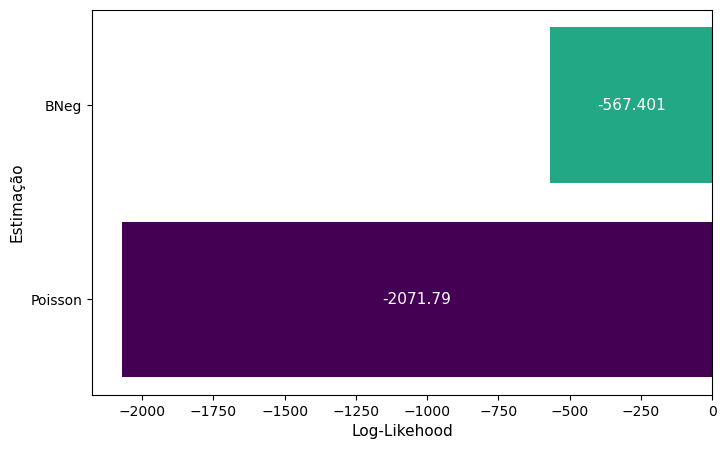

In [57]:
#Plotagem propriamente dita
fig, ax = plt.subplots(figsize=(8,5))

c = ['#440154FF', '#22A884FF']

ax1 = ax.barh(df_llf.modelo, df_llf.loglik, color = c)
ax.bar_label(ax1, label_type='center', color='white', fontsize=11)
ax.set_ylabel("Estimação", fontsize=11)
ax.set_xlabel("Log-Likehood", fontsize=11)

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1500x800 with 0 Axes>

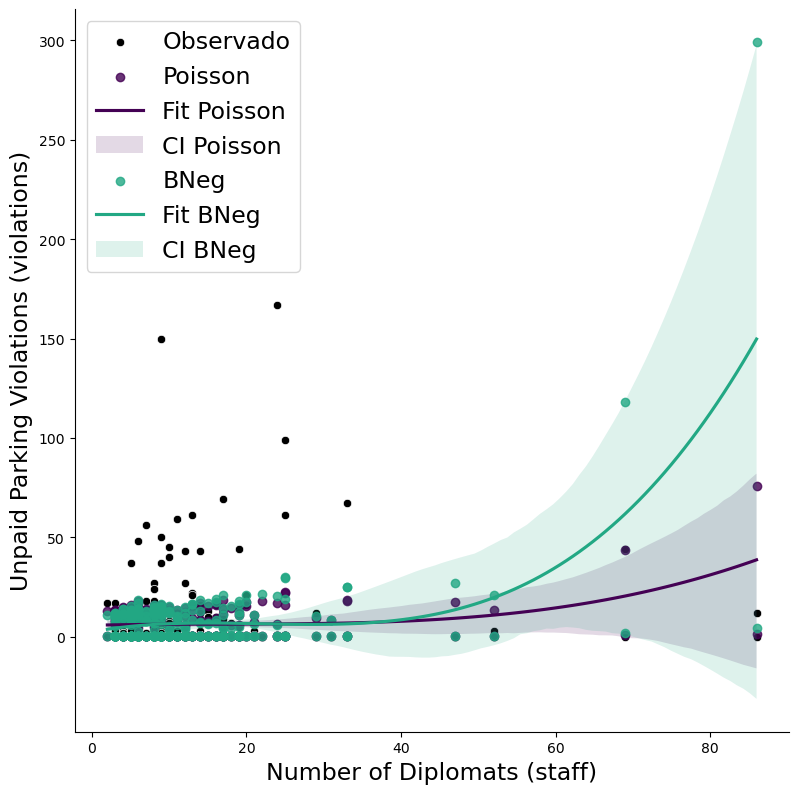

In [53]:
# In[ ]: Fitted values dos modelos Poisson e binomial negativo, considerando,
#para fins didáticos, apenas a variável preditora 'staff':

plt.figure(figsize=(15,8))
sns.relplot(data=df_corrupcao, x='staff', y='violations',
            ci=False, color='black', height=8)
sns.regplot(data=df_corrupcao, x='staff', y='fitted_poisson', order=3,
            color='#440154FF')
sns.regplot(data=df_corrupcao, x='staff', y='fitted_bneg', order=3,
            color='#22A884FF')
plt.xlabel('Number of Diplomats (staff)', fontsize=17)
plt.ylabel('Unpaid Parking Violations (violations)', fontsize=17)
plt.legend(['Observado', 'Poisson', 'Fit Poisson', 'CI Poisson',
            'BNeg', 'Fit BNeg', 'CI BNeg'],
           fontsize=17)
plt.show

### Quando não há superdispersão os modelos poisson e Binomial Negativo apresentam basicamente os mesmo resultados. 

Os parâmetros estimados pelo modelo Binomial Negativo regridem aos parâmetros estimados pelo modelo de poisson.

Quando o parâmetro de forma da distribuição Binomial Negativo theta não se mostra estatisticamente significante, ou seja, a regressão Binomial Negativa não deixa de ser uma regressão Poisson para os casos em que theta  não se mostra estatisticamente diferente de zero.